In [1]:
import pandas as pd

In [2]:
book=pd.read_csv("book.csv")
book


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [4]:
import numpy as np


In [16]:
# Building the model
frequent_items=apriori((book),min_support=0.02,use_colnames = True)

In [31]:
# Collecting the inferred rules in a dataframe
rules=association_rules(frequent_items,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
3223,(ArtBks),"(DoItYBks, GeogBks, ChildBks, CookBks, RefBks)",0.2410,0.0450,0.024,0.099585,2.213001,0.013155,1.060622
3224,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks, RefBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714
3225,(ChildBks),"(DoItYBks, ArtBks, GeogBks, CookBks, RefBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996
3226,(CookBks),"(DoItYBks, ArtBks, GeogBks, ChildBks, RefBks)",0.4310,0.0275,0.024,0.055684,2.024889,0.012148,1.029846


In [18]:
rules=rules.sort_values(['confidence','lift'],ascending=[False,False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1676,"(ItalCook, ItalAtlas)","(CookBks, RefBks)",0.0230,0.1525,0.0230,1.0,6.557377,0.019492,inf
2535,"(ItalCook, ItalAtlas, ChildBks)","(CookBks, RefBks)",0.0200,0.1525,0.0200,1.0,6.557377,0.016950,inf
1733,"(ItalCook, ItalArt)","(ArtBks, CookBks)",0.0375,0.1670,0.0375,1.0,5.988024,0.031237,inf
2596,"(ItalCook, ItalArt, ChildBks)","(ArtBks, CookBks)",0.0285,0.1670,0.0285,1.0,5.988024,0.023741,inf
2864,"(DoItYBks, ItalCook, ItalArt)","(ArtBks, CookBks)",0.0250,0.1670,0.0250,1.0,5.988024,0.020825,inf


In [54]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [56]:
R=rules.iloc[:,4:7]
R

,support,confidence,lift
0,0.165,0.666667,1.576044
1,0.165,0.390071,1.576044
2,0.256,0.593968,1.404179
3,0.256,0.605201,1.404179
4,0.184,0.652482,1.542511
...,...,...,...
3223,0.024,0.099585,2.213001
3224,0.024,0.086957,2.350176
3225,0.024,0.056738,2.063185
3226,0.024,0.055684,2.024889


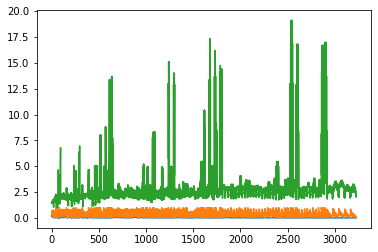

In [62]:
import matplotlib.pyplot as plt
plt.plot(R)

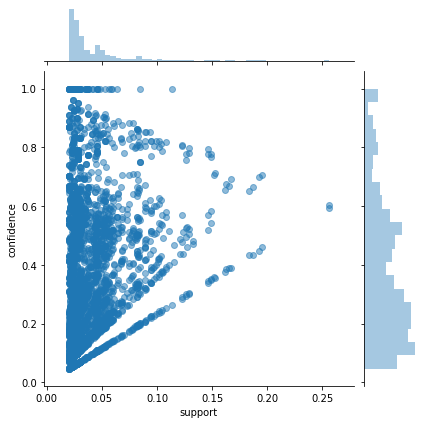

In [60]:
import seaborn as sns
sns.jointplot(x='support',y='confidence',data=R,alpha=0.5)

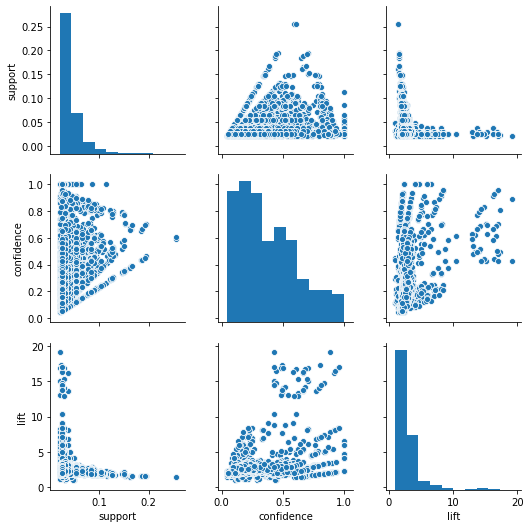

In [63]:
sns.pairplot(R)

Text(0, 0.5, 'confidence')

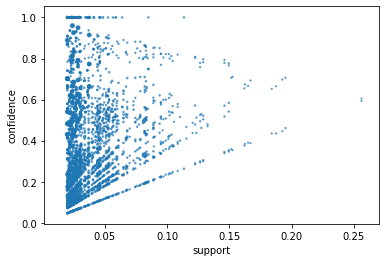

In [84]:

plt.scatter(R['support'],R['confidence'], s=R['lift'], alpha=0.6, )
plt.xlabel('support')
plt.ylabel('confidence')

In [83]:
frequent_items=apriori((book),min_support=0.05,use_colnames = True)
rules=association_rules(frequent_items,metric='lift',min_threshold=2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(YouthBks),0.1135,0.2475,0.0590,0.519824,2.100298,0.030909,1.567133
1,(YouthBks),(ItalCook),0.2475,0.1135,0.0590,0.238384,2.100298,0.030909,1.163972
2,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
3,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
4,(ArtBks),(ItalCook),0.2410,0.1135,0.0565,0.234440,2.065549,0.029147,1.157976
...,...,...,...,...,...,...,...,...,...
501,"(CookBks, ChildBks)","(DoItYBks, ArtBks, GeogBks)",0.2560,0.0730,0.0535,0.208984,2.862800,0.034812,1.171911
502,(DoItYBks),"(ArtBks, GeogBks, CookBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
503,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
504,(GeogBks),"(DoItYBks, ArtBks, CookBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733


In [57]:
#support=rules.as_matrix(columns=['support'])
#confidence=rules.as_matrix(columns=['confidence'])
#lift=rules.as_matrix(columns=['lift'])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
